In [1]:
import pandas as pd

X_train = pd.read_csv('../data/processed/xtrain.csv')
X_test = pd.read_csv('../data/processed/xtest.csv')
y_train = pd.read_csv('../data/processed/ytrain.csv')
y_test = pd.read_csv('../data/processed/ytest.csv')

df_data = pd.read_csv('../data/processed/dfdata.csv')
y_test.head()

,Unnamed: 0,Outcome
0,192,1
1,614,1
2,69,0
3,271,0
4,612,1


In [2]:
df_data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [3]:
X_train.drop("Unnamed: 0", axis=1, inplace=True)
X_test.drop("Unnamed: 0", axis=1, inplace=True)
y_train.drop("Unnamed: 0", axis=1, inplace=True)
y_test.drop("Unnamed: 0", axis=1, inplace=True)
df_data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,159,66,0,0,30.4,0.383,36
1,11,138,74,26,144,36.1,0.557,50
2,4,146,85,27,100,28.9,0.189,27
3,2,108,62,32,56,25.2,0.128,21
4,7,168,88,42,321,38.2,0.787,40


In [5]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0


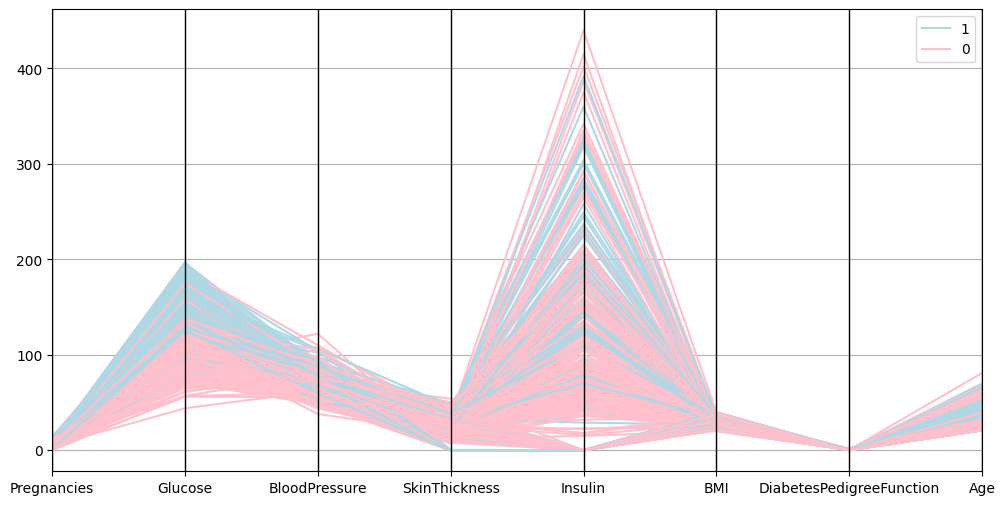

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df_data, "Outcome", color = ('lightblue', 'pink'))

plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 11)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

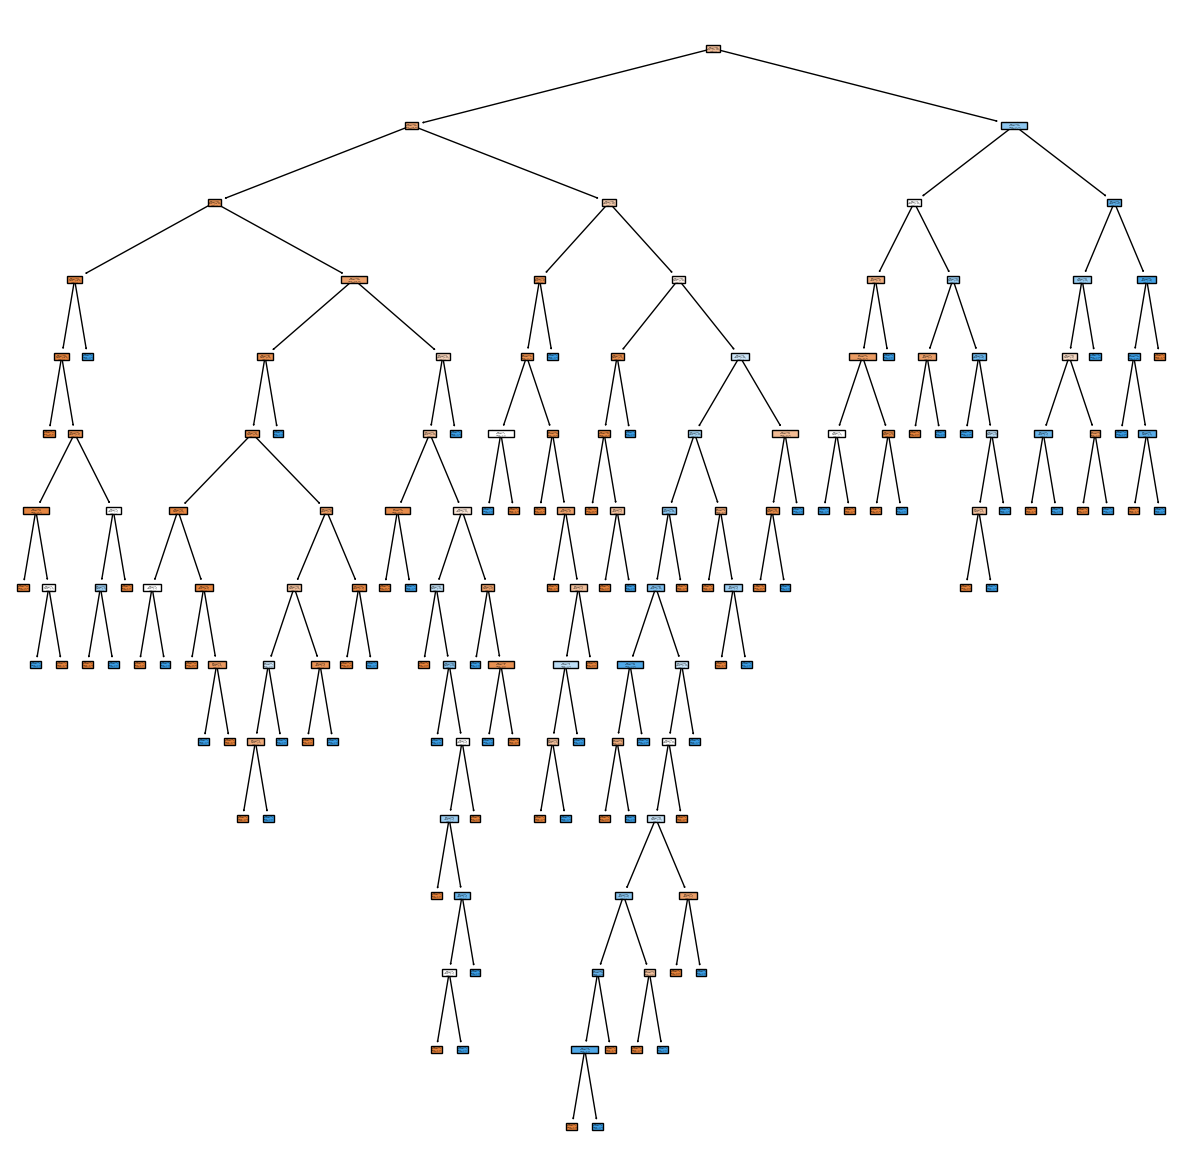

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.71900826446281

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'class_weight': [None, 'balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [12]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}


In [13]:
model = DecisionTreeClassifier(class_weight= None, criterion = 'entropy', max_depth = 5, max_features= None, min_samples_leaf = 4, min_samples_split = 20, random_state = 11)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=20, random_state=11)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8347107438016529

In [16]:
y_pred = model.predict(X_train)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.8099173553719008

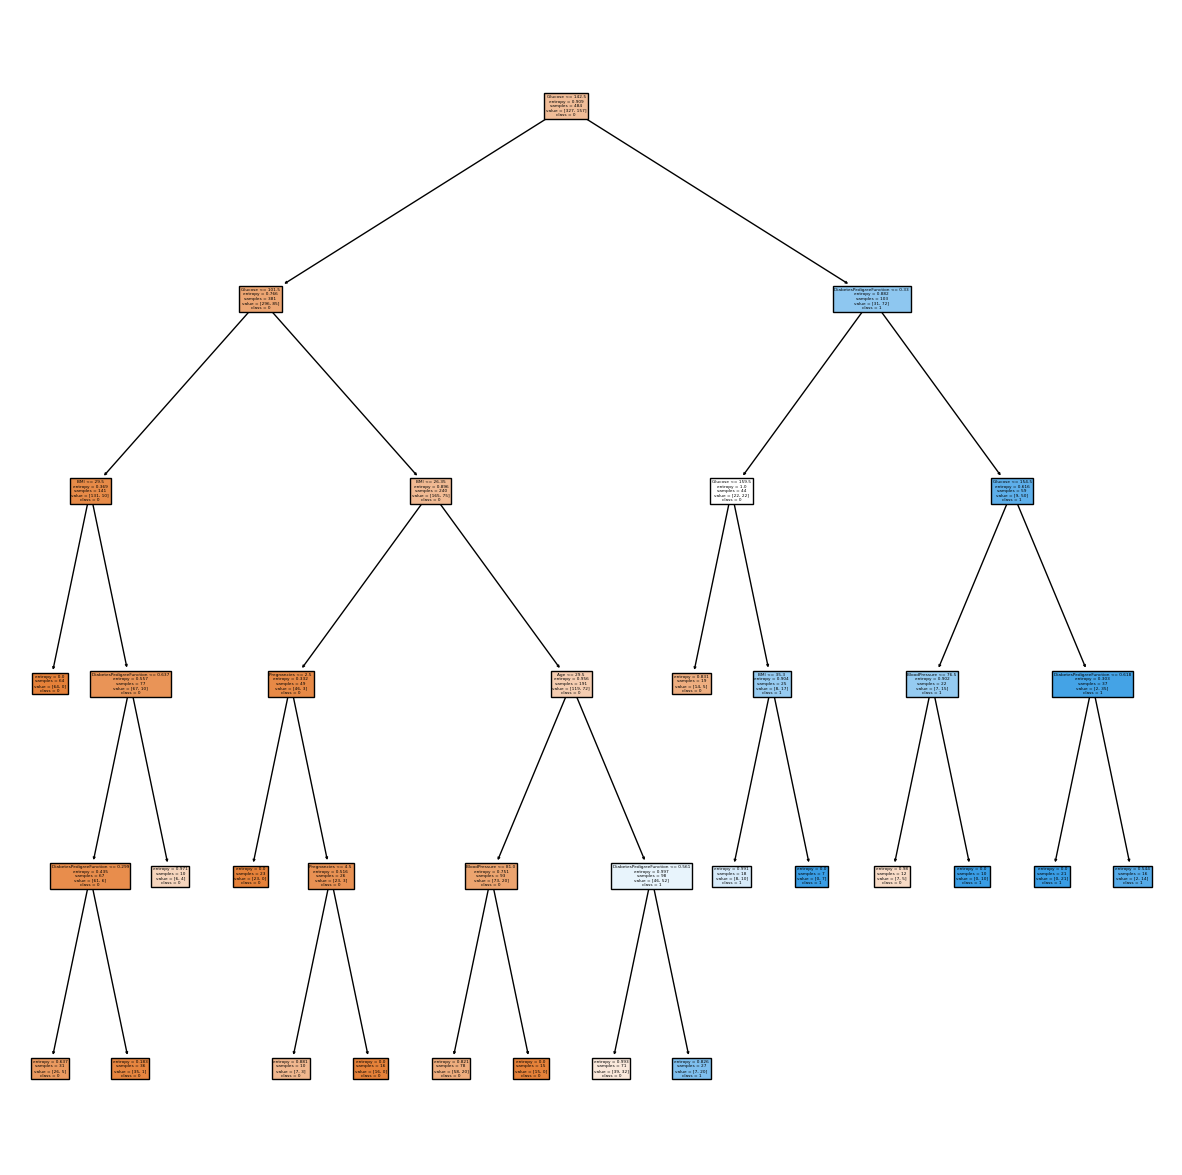

In [ ]:
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [ ]:
from pickle import dump

dump(model, open("../models/tree_classifier_classwei_None_crit-entro_maxdepth-5_maxfeature_None_minleaf-4_minsplit20_42.sav", "wb"))